## Baixando as dependências

In [ ]:
!pip install pyvis
!pip install nxviz
!pip install pingouin

## Importando as dependências

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import networkx as nx
from nxviz import CircosPlot
from pyvis.network import Network
from IPython.core.display import display, HTML
import numpy as np
import pingouin as pg

In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('responses.csv')

Saving responses.csv to responses (1).csv


In [ ]:
cols = [
"Horror",
"Thriller",
"Comedy",
"Romantic",
"Sci-fi",
"War",
"Fantasy/Fairy tales",
"Animated",
"Documentary",
"Western",
"Dance",
"Folk",
"Country",
"Classical music",
"Pop",
"Rock",
"Metal or Hardrock",
"Punk",
"Hiphop, Rap",
"Reggae, Ska",
"Swing, Jazz",
"Rock n roll",
"Alternative",
"Latino",
"Techno, Trance",
"Opera",
"Action",
"History",
"Psychology",
"Politics",
"Mathematics",
"Physics",
"Internet",
"PC",
"Economy Management",
"Biology",
"Chemistry",
"Reading",
"Geography",
"Foreign languages",
"Medicine",
"Law",
"Cars",
"Art exhibitions",
"Religion",
"Countryside, outdoors",
"Dancing",
"Musical instruments",
"Writing",
"Passive sport",
"Active sport",
"Gardening",
"Celebrities",
"Shopping",
"Science and technology",
"Theatre",
"Fun with friends",
"Adrenaline sports",
"Pets",
"Flying"
]
filtered_df = df.loc[:, cols]
filtered_df.columns

Index(['Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War',
       'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western', 'Dance',
       'Folk', 'Country', 'Classical music', 'Pop', 'Rock',
       'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska',
       'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 'Techno, Trance',
       'Opera', 'Action', 'History', 'Psychology', 'Politics', 'Mathematics',
       'Physics', 'Internet', 'PC', 'Economy Management', 'Biology',
       'Chemistry', 'Reading', 'Geography', 'Foreign languages', 'Medicine',
       'Law', 'Cars', 'Art exhibitions', 'Religion', 'Countryside, outdoors',
       'Dancing', 'Musical instruments', 'Writing', 'Passive sport',
       'Active sport', 'Gardening', 'Celebrities', 'Shopping',
       'Science and technology', 'Theatre', 'Fun with friends',
       'Adrenaline sports', 'Pets', 'Flying'],
      dtype='object')

In [ ]:
def polychronic_correlation(x, y):

    if len(x) != len(y):
        raise ValueError("Input arrays must have the same length")

    mean_x = np.mean(x)
    mean_y = np.mean(y)
    covariance = np.sum((x - mean_x) * (y - mean_y))
    std_x = np.sqrt(np.sum((x - mean_x) ** 2))
    std_y = np.sqrt(np.sum((y - mean_y) ** 2))
    correlation = covariance / (std_x * std_y)
    return correlation

In [ ]:
correlations = {}

for col1 in filtered_df.columns:
    for col2 in filtered_df.columns:
        if col1 == col2:
          continue
        key = col1 + "&" + col2
        corr = polychronic_correlation(filtered_df[col1], filtered_df[col2])
        correlations[key] = corr


print(correlations)

{'Horror&Thriller': 0.5054116661846886, 'Horror&Comedy': 0.10180362057641826, 'Horror&Romantic': -0.1264837729018425, 'Horror&Sci-fi': 0.1682012446458387, 'Horror&War': 0.14216314002291766, 'Horror&Fantasy/Fairy tales': -0.0886877014743153, 'Horror&Animated': 0.007335949144911619, 'Horror&Documentary': -0.06296783145574075, 'Horror&Western': 0.08293931026658839, 'Horror&Dance': 0.07625469016695664, 'Horror&Folk': -0.10179880398153437, 'Horror&Country': 0.02851460945205655, 'Horror&Classical music': -0.09012566551689721, 'Horror&Pop': -0.0008085178759636028, 'Horror&Rock': -0.012890649621608297, 'Horror&Metal or Hardrock': 0.06377863675748371, 'Horror&Punk': 0.08162882280122626, 'Horror&Hiphop, Rap': 0.13098432230930332, 'Horror&Reggae, Ska': 0.08012295981170554, 'Horror&Swing, Jazz': -0.0766313855888485, 'Horror&Rock n roll': 0.032871377170785636, 'Horror&Alternative': -0.021225446001085623, 'Horror&Latino': -0.09798848293982299, 'Horror&Techno, Trance': 0.10201299125595915, 'Horror&Op

In [ ]:
G = nx.Graph()

G.add_nodes_from(cols)

for key, weight in correlations.items():
    if weight > 0.2:
        music_genre, movie_genre = key.split('&')
        G.add_edge(music_genre, movie_genre, weight=weight)


**Matriz de adjacência**

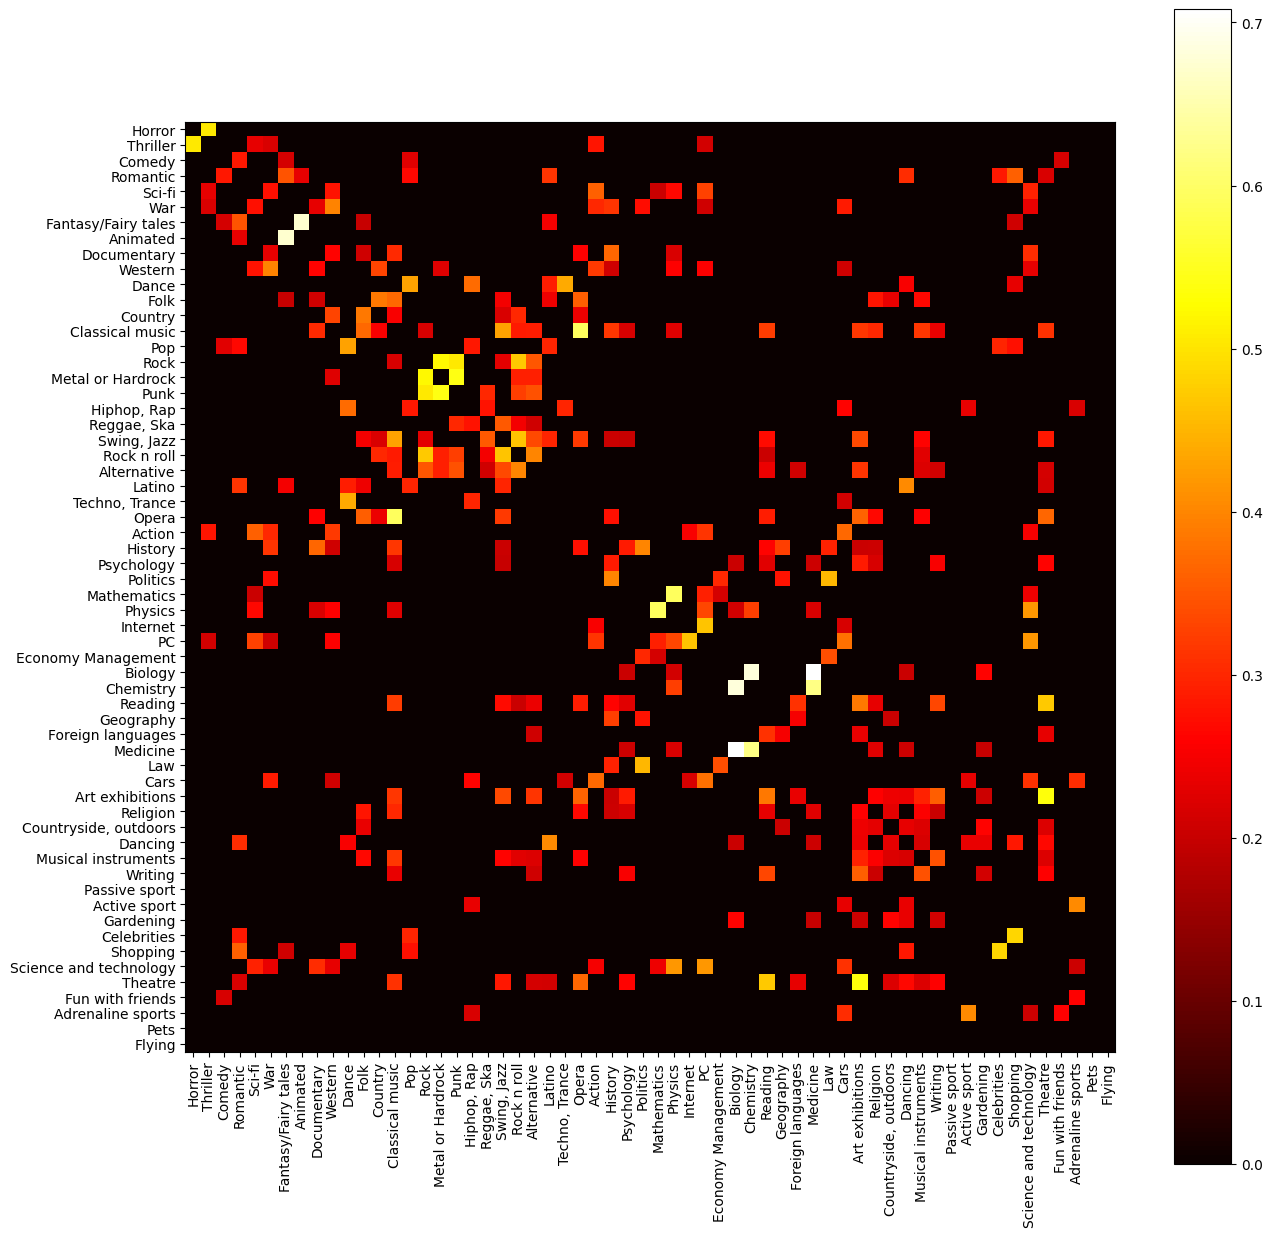

In [ ]:
adj_matrix = nx.adjacency_matrix(G)
adj_df = pd.DataFrame(adj_matrix.toarray(), index=G.nodes(), columns=G.nodes())

plt_1 = plt.figure(figsize=(15, 15))

plt.imshow(adj_df, cmap='hot', interpolation='nearest')
plt.xticks(range(len(adj_df.columns)), adj_df.columns, rotation='vertical')
plt.yticks(range(len(adj_df.index)), adj_df.index)
plt.colorbar()
plt.show()


**Componentes conectados**

Ao listar os componentes conectados, vemos que existem 3 nós que não estão conectados com nenhum outro nó.

In [ ]:
connected_components = list(nx.connected_components(G))

for component in connected_components:
    print(component)

{'Metal or Hardrock', 'Musical instruments', 'Action', 'Alternative', 'Chemistry', 'Fun with friends', 'Western', 'Geography', 'Techno, Trance', 'Animated', 'Swing, Jazz', 'Celebrities', 'Hiphop, Rap', 'War', 'Internet', 'Fantasy/Fairy tales', 'Documentary', 'Classical music', 'Cars', 'Active sport', 'Dance', 'Medicine', 'Science and technology', 'Theatre', 'Comedy', 'Rock n roll', 'Thriller', 'Physics', 'Law', 'PC', 'Politics', 'Country', 'Reggae, Ska', 'Mathematics', 'Dancing', 'Shopping', 'Countryside, outdoors', 'Rock', 'Sci-fi', 'History', 'Horror', 'Art exhibitions', 'Adrenaline sports', 'Religion', 'Romantic', 'Pop', 'Biology', 'Opera', 'Latino', 'Folk', 'Foreign languages', 'Gardening', 'Reading', 'Punk', 'Economy Management', 'Psychology', 'Writing'}
{'Passive sport'}
{'Pets'}
{'Flying'}


Ao listar os componentes conectados, vemos que existem 3 nós que não estão conectados com nenhum outro nó.

Vamos remover também os possíveis self-loops para conseguir visualizar as camadas.

In [ ]:
G.remove_edges_from(nx.selfloop_edges(G))

In [ ]:
set([v for k,v in nx.core_number(G).items()])

{0, 1, 2, 3, 4, 5, 7}

Existem nós com entre 0 e 7 graus. Vamos remover o que não estão conectados (grau igual a 0)

In [ ]:
degrees = dict(G.degree())
filtered_nodes = [node for node, degree in degrees.items() if degree > 0]
filtered_graph = G.subgraph(filtered_nodes)
print(filtered_nodes)

['Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western', 'Dance', 'Folk', 'Country', 'Classical music', 'Pop', 'Rock', 'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 'Techno, Trance', 'Opera', 'Action', 'History', 'Psychology', 'Politics', 'Mathematics', 'Physics', 'Internet', 'PC', 'Economy Management', 'Biology', 'Chemistry', 'Reading', 'Geography', 'Foreign languages', 'Medicine', 'Law', 'Cars', 'Art exhibitions', 'Religion', 'Countryside, outdoors', 'Dancing', 'Musical instruments', 'Writing', 'Active sport', 'Gardening', 'Celebrities', 'Shopping', 'Science and technology', 'Theatre', 'Fun with friends', 'Adrenaline sports']


In [ ]:
set([v for k,v in nx.core_number(filtered_graph).items()])

{1, 2, 3, 4, 5, 7}

Agora só existe um componente conectado no grafo.

In [ ]:
connected_components = list(nx.connected_components(filtered_graph))

for component in connected_components:
    print(component)

{'Metal or Hardrock', 'Musical instruments', 'Action', 'Alternative', 'Chemistry', 'Fun with friends', 'Western', 'Geography', 'Techno, Trance', 'Animated', 'Swing, Jazz', 'Celebrities', 'Hiphop, Rap', 'War', 'Internet', 'Fantasy/Fairy tales', 'Documentary', 'Classical music', 'Cars', 'Active sport', 'Dance', 'Medicine', 'Science and technology', 'Theatre', 'Comedy', 'Rock n roll', 'Thriller', 'Physics', 'Law', 'PC', 'Politics', 'Country', 'Reggae, Ska', 'Mathematics', 'Dancing', 'Shopping', 'Countryside, outdoors', 'Rock', 'Sci-fi', 'History', 'Horror', 'Art exhibitions', 'Adrenaline sports', 'Religion', 'Romantic', 'Pop', 'Biology', 'Opera', 'Latino', 'Folk', 'Foreign languages', 'Gardening', 'Reading', 'Punk', 'Economy Management', 'Psychology', 'Writing'}


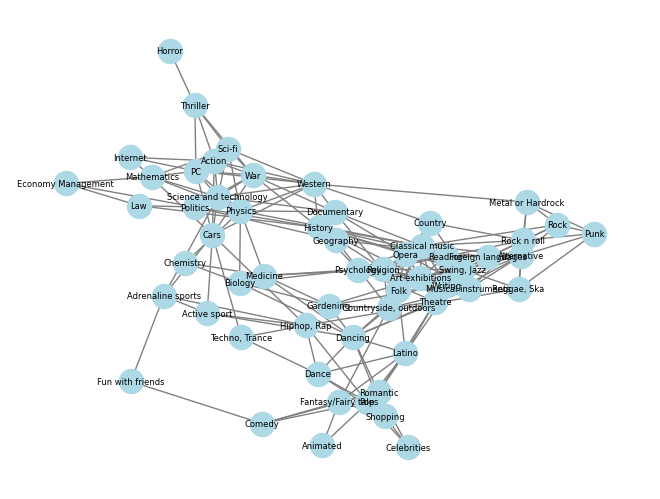

<Figure size 3000x3000 with 0 Axes>

In [ ]:
pos = nx.spring_layout(filtered_graph, seed=42)
nx.draw(filtered_graph, with_labels=False, node_color='lightblue', edge_color='gray', pos=pos)
nx.draw_networkx_labels(filtered_graph, pos, font_size=6)
plt.figure(figsize=(30, 30))
plt.show()

**Diâmetro da rede**

In [ ]:
if nx.is_connected(filtered_graph):
    diameter = nx.diameter(filtered_graph)
    print("Diâmetro da rede:", diameter)
else:
    print("A rede não é totalmente conectada. Não é possível o cálculo do diâmetro")

Diâmetro da rede: 6


**Periferia da rede**

In [ ]:
if nx.is_connected(filtered_graph):
    peripheral_nodes = nx.periphery(filtered_graph)
    print("Nós periféricos da rede:", peripheral_nodes)
else:
    print("A rede não é totalmente conectada. Não achar a periferia")

Nós periféricos da rede: ['Horror', 'Comedy', 'Romantic', 'Animated', 'Economy Management', 'Celebrities', 'Shopping']


**Histograma de distribuição empírica de grau**

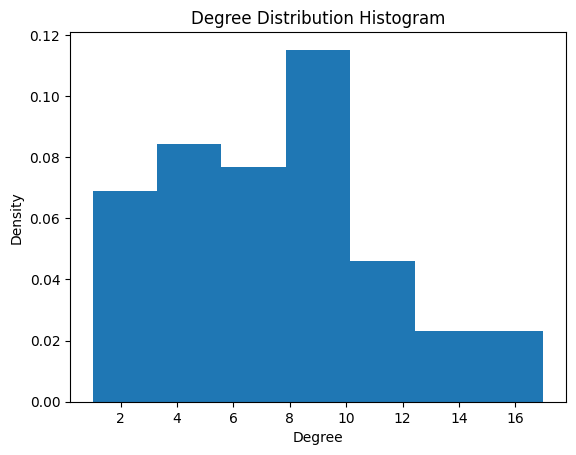

In [ ]:
degree_sequence = [degree for _, degree in filtered_graph.degree()]
plt.hist(degree_sequence, bins='auto', density=True)
plt.xlabel('Degree')
plt.ylabel('Density')
plt.title('Degree Distribution Histogram')
plt.show()

**Coeﬁciente de clustering local para nós escolhidos.**

In [ ]:
selected_nodes = ["Rock", "Opera"]

for node in selected_nodes:
    clustering_coefficient = nx.clustering(filtered_graph, node)
    print(f"Coeficiente de clustering local para o nó {node}: {clustering_coefficient}")

Coeficiente de clustering local para o nó Rock: 0.7333333333333333
Coeficiente de clustering local para o nó Opera: 0.6


**Coeﬁciente de clustering global**

In [ ]:
clustering_coefficient = nx.average_clustering(filtered_graph)

print(f"Coeficiente de clustering global: {clustering_coefficient}")

Coeficiente de clustering global: 0.5012982316387888


**Eigenvector centrality**

In [ ]:
eigenvector_centrality = nx.eigenvector_centrality(filtered_graph)

for node, centrality in eigenvector_centrality.items():
    print(f"{node} = {centrality}")

Horror = 0.001418609593552628
Thriller = 0.015028586735587551
Comedy = 0.01122919964252285
Romantic = 0.05804902030221203
Sci-fi = 0.03362148148953499
War = 0.05853046290237066
Fantasy/Fairy tales = 0.035367465099684865
Animated = 0.008816758098832096
Documentary = 0.11383108725245071
Western = 0.07664794458792087
Dance = 0.028766624562843564
Folk = 0.17394425988559203
Country = 0.12028157633687139
Classical music = 0.3267928362298795
Pop = 0.02349547700984719
Rock = 0.1076096759540497
Metal or Hardrock = 0.06122703197769823
Punk = 0.060884549242627754
Hiphop, Rap = 0.017931564108399762
Reggae, Ska = 0.07268021996271518
Swing, Jazz = 0.2876793117068072
Rock n roll = 0.16896910049140074
Alternative = 0.2346047825475486
Latino = 0.09537012423898031
Techno, Trance = 0.007161875646016547
Opera = 0.24038244939740763
Action = 0.028736598594341644
History = 0.20820565195308
Psychology = 0.2096537985910147
Politics = 0.032380652155496494
Mathematics = 0.01879490587714046
Physics = 0.0759776043

**Visualizando os nós por Eingenvector Centrality**

<ipython-input-55-2fbf5c9e408f>:14: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


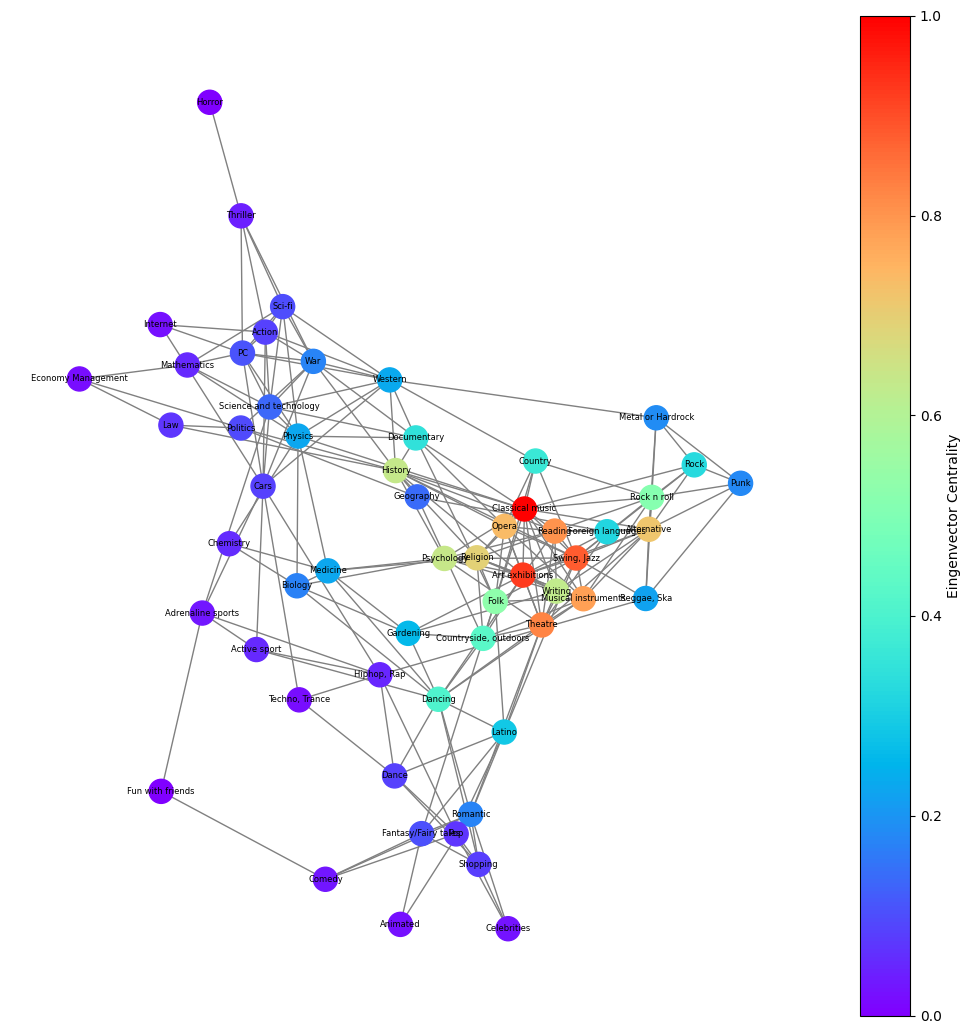

In [ ]:
eigenvector_centrality = nx.eigenvector_centrality(filtered_graph)

plt.figure(figsize=(10, 10))

color_map = [eigenvector_centrality[node] for node in filtered_graph.nodes()]

pos = nx.spring_layout(filtered_graph, seed=42)
cmap = mpl.colormaps['rainbow']
nx.draw(filtered_graph, with_labels=False, pos=pos, node_color=color_map, edge_color='gray', cmap=cmap)
nx.draw_networkx_labels(filtered_graph, pos, font_size=6)

sm = cm.ScalarMappable(cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Eingenvector Centrality')
plt.show()

**Degree centrality**

In [ ]:
degree_centrality = nx.degree_centrality(filtered_graph)
for node, centrality in degree_centrality.items():
    print(f"{node} = {centrality}")

Horror = 0.017857142857142856
Thriller = 0.08928571428571427
Comedy = 0.07142857142857142
Romantic = 0.1607142857142857
Sci-fi = 0.14285714285714285
War = 0.17857142857142855
Fantasy/Fairy tales = 0.10714285714285714
Animated = 0.03571428571428571
Documentary = 0.14285714285714285
Western = 0.19642857142857142
Dance = 0.10714285714285714
Folk = 0.17857142857142855
Country = 0.10714285714285714
Classical music = 0.30357142857142855
Pop = 0.125
Rock = 0.10714285714285714
Metal or Hardrock = 0.08928571428571427
Punk = 0.08928571428571427
Hiphop, Rap = 0.125
Reggae, Ska = 0.08928571428571427
Swing, Jazz = 0.26785714285714285
Rock n roll = 0.17857142857142855
Alternative = 0.23214285714285712
Latino = 0.14285714285714285
Techno, Trance = 0.05357142857142857
Opera = 0.19642857142857142
Action = 0.14285714285714285
History = 0.23214285714285712
Psychology = 0.17857142857142855
Politics = 0.08928571428571427
Mathematics = 0.08928571428571427
Physics = 0.17857142857142855
Internet = 0.053571428

**Visualizando os nós por Degree Centrality**

<ipython-input-57-b16da68f9fc7>:14: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


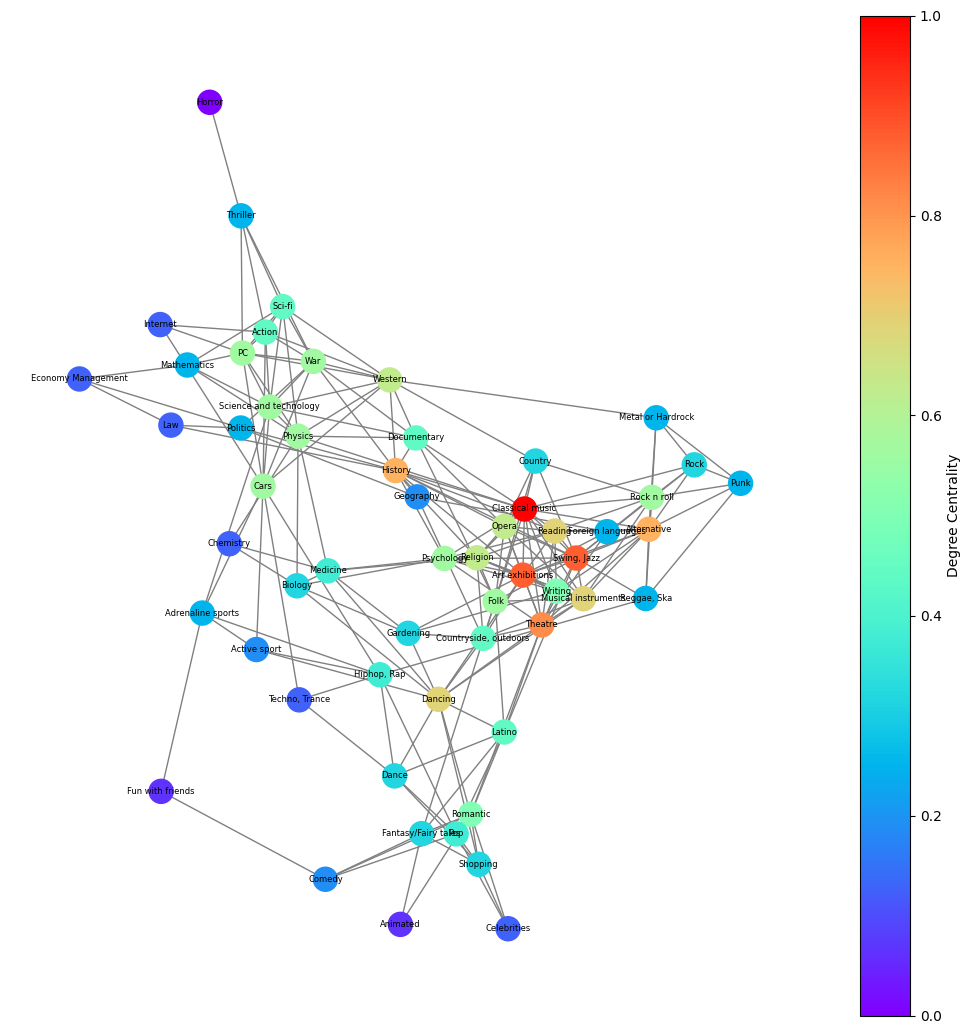

In [ ]:
degree_centrality = nx.degree_centrality(filtered_graph)

plt.figure(figsize=(10, 10))

color_map = [degree_centrality[node] for node in filtered_graph.nodes()]

pos = nx.spring_layout(filtered_graph, seed=42)
cmap = mpl.colormaps['rainbow']
nx.draw(filtered_graph, with_labels=False, pos=pos, node_color=color_map, edge_color='gray', cmap=cmap)
nx.draw_networkx_labels(filtered_graph, pos, font_size=6)

sm = cm.ScalarMappable(cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Degree Centrality')
plt.show()

**Closeness centrality.**

In [ ]:
closeness_centrality = nx.closeness_centrality(filtered_graph)
for node, centrality in closeness_centrality.items():
    print(f" {node} = {centrality}")

 Horror = 0.24242424242424243
 Thriller = 0.3181818181818182
 Comedy = 0.3181818181818182
 Romantic = 0.3783783783783784
 Sci-fi = 0.3684210526315789
 War = 0.42424242424242425
 Fantasy/Fairy tales = 0.3522012578616352
 Animated = 0.29015544041450775
 Documentary = 0.45161290322580644
 Western = 0.4444444444444444
 Dance = 0.37583892617449666
 Folk = 0.4409448818897638
 Country = 0.4117647058823529
 Classical music = 0.48695652173913045
 Pop = 0.36129032258064514
 Rock = 0.3660130718954248
 Metal or Hardrock = 0.37583892617449666
 Punk = 0.3393939393939394
 Hiphop, Rap = 0.3916083916083916
 Reggae, Ska = 0.38620689655172413
 Swing, Jazz = 0.47058823529411764
 Rock n roll = 0.3971631205673759
 Alternative = 0.42424242424242425
 Latino = 0.417910447761194
 Techno, Trance = 0.34355828220858897
 Opera = 0.43410852713178294
 Action = 0.36363636363636365
 History = 0.4628099173553719
 Psychology = 0.42748091603053434
 Politics = 0.36363636363636365
 Mathematics = 0.3522012578616352
 Physics 

**Visualizando os Nós por Closeness Centrality**

<ipython-input-59-de3988f2f404>:14: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


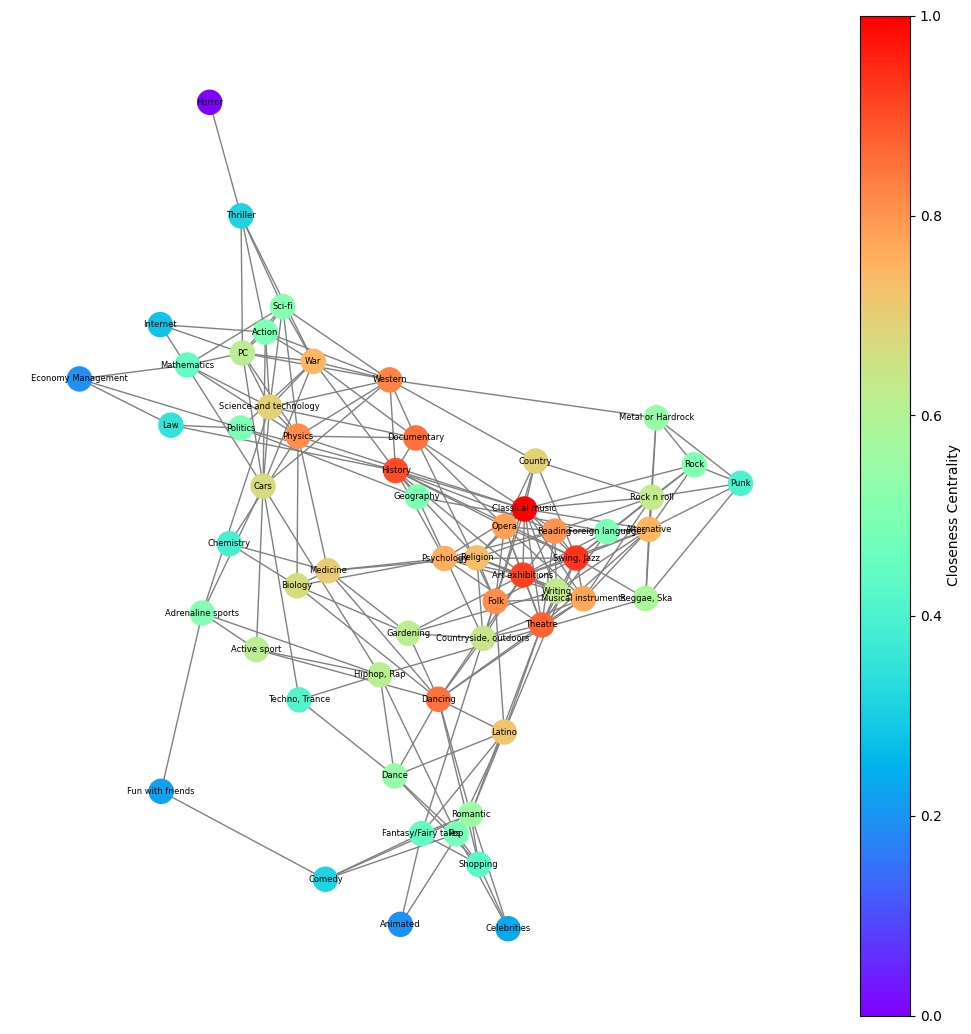

In [ ]:
closeness_centrality = nx.closeness_centrality(filtered_graph)

plt.figure(figsize=(10, 10))

color_map = [closeness_centrality[node] for node in filtered_graph.nodes()]

pos = nx.spring_layout(filtered_graph, seed=42)
cmap = mpl.colormaps['rainbow']
nx.draw(filtered_graph, with_labels=False, pos=pos, node_color=color_map, edge_color='gray', cmap=cmap)
nx.draw_networkx_labels(filtered_graph, pos, font_size=6)

sm = cm.ScalarMappable(cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Closeness Centrality')
plt.show()

**Betweness centrality**

In [ ]:
betweenness_centrality = nx.betweenness_centrality(filtered_graph)

for node, centrality in betweenness_centrality.items():
    print(f"{node} = {centrality}")

Horror = 0.0
Thriller = 0.03571428571428571
Comedy = 0.01593198468198468
Romantic = 0.06831529131369568
Sci-fi = 0.011494865190210589
War = 0.07352042116442385
Fantasy/Fairy tales = 0.027200129659322357
Animated = 0.0
Documentary = 0.041718401781262564
Western = 0.0744291754240143
Dance = 0.022736779072722542
Folk = 0.05641316096696562
Country = 0.010047233327145789
Classical music = 0.0804231817991269
Pop = 0.02789347881417417
Rock = 0.003437779113313256
Metal or Hardrock = 0.018617278317318534
Punk = 0.0012294748901891758
Hiphop, Rap = 0.05976762964786997
Reggae, Ska = 0.02607823253694913
Swing, Jazz = 0.059211226374845195
Rock n roll = 0.013827077998108584
Alternative = 0.03928869591247158
Latino = 0.03658244314543756
Techno, Trance = 0.005178120305125653
Opera = 0.010981636823934906
Action = 0.013057178443908645
History = 0.12613475729342483
Psychology = 0.01913253653789204
Politics = 0.021353257602105796
Mathematics = 0.015458427852954579
Physics = 0.09237193376002766
Internet = 0

**Visualizando os nós por Betweeness Centrality**

<ipython-input-61-cfda20bdd6a8>:14: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


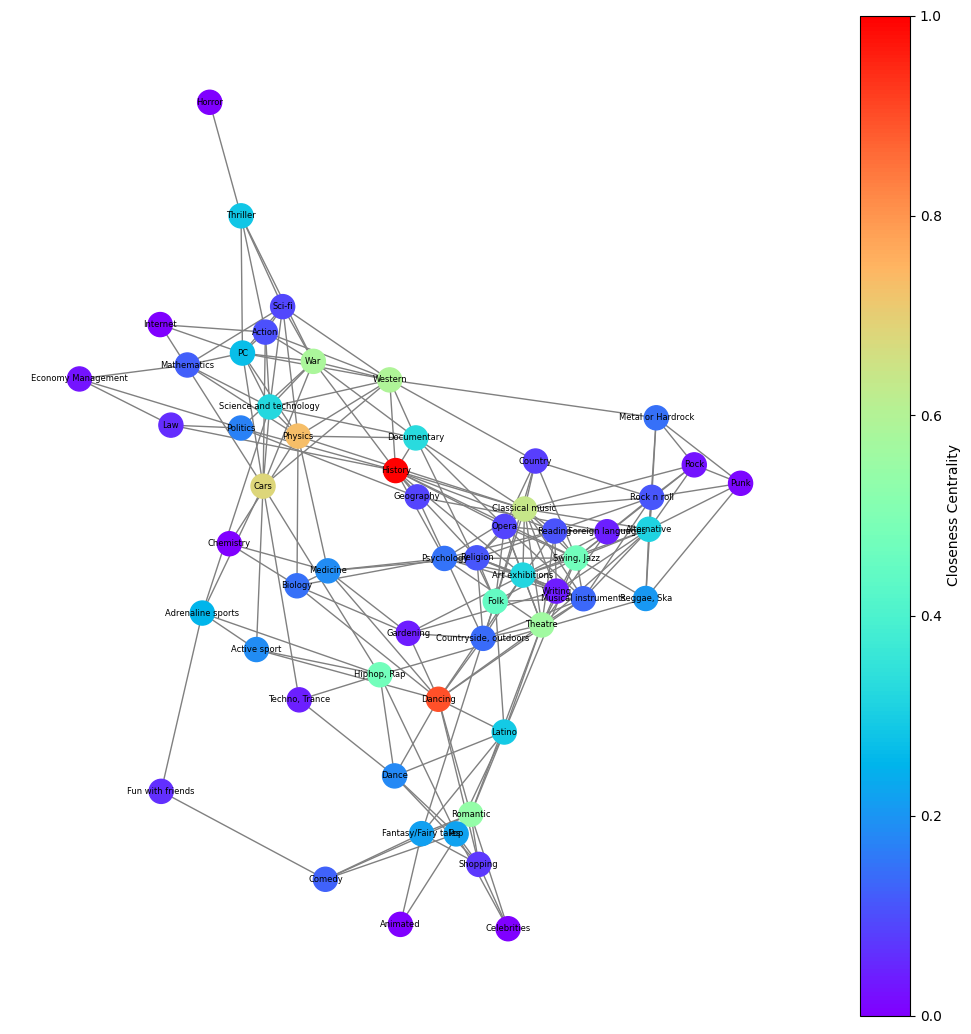

In [ ]:
betweenness_centrality = nx.betweenness_centrality(filtered_graph)

plt.figure(figsize=(10, 10))

color_map = [betweenness_centrality [node] for node in filtered_graph.nodes()]

pos = nx.spring_layout(filtered_graph, seed=42)
cmap = mpl.colormaps['rainbow']
nx.draw(filtered_graph, with_labels=False, pos=pos, node_color=color_map, edge_color='gray', cmap=cmap)
nx.draw_networkx_labels(filtered_graph, pos, font_size=6)

sm = cm.ScalarMappable(cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Closeness Centrality')
plt.show()

**Assortatividade geral da rede.**

In [ ]:
assortativity = nx.degree_assortativity_coefficient(filtered_graph)

print(f"Overall Assortativity = {assortativity}")

Overall Assortativity = 0.29862001017444756


**Salvar para graphml**

Usado para gerar um arquivo que pode ser visualizado no gephi

In [ ]:
nx.write_graphml(filtered_graph, "responses.graphml")

/usr/local/lib/python3.10/dist-packages/nxviz/api.py:275: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


<Figure size 1000x1000 with 0 Axes>

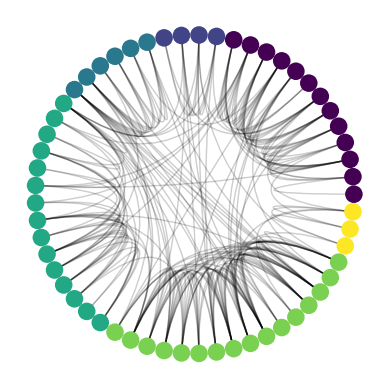

In [ ]:
import community.community_louvain as community_louvain


partition = community_louvain.best_partition(filtered_graph, weight='Weight')

for node in filtered_graph.nodes():
    filtered_graph.nodes[node]['partition'] = partition[node]

edge_weights = np.array([filtered_graph[u][v]['weight'] for u, v in filtered_graph.edges()])
edge_widths = (edge_weights / np.percentile(edge_weights, 98)) * 3

plt.figure(figsize=(10, 10))
c = CircosPlot(filtered_graph, node_order='partition', node_color='partition')
plt.show()


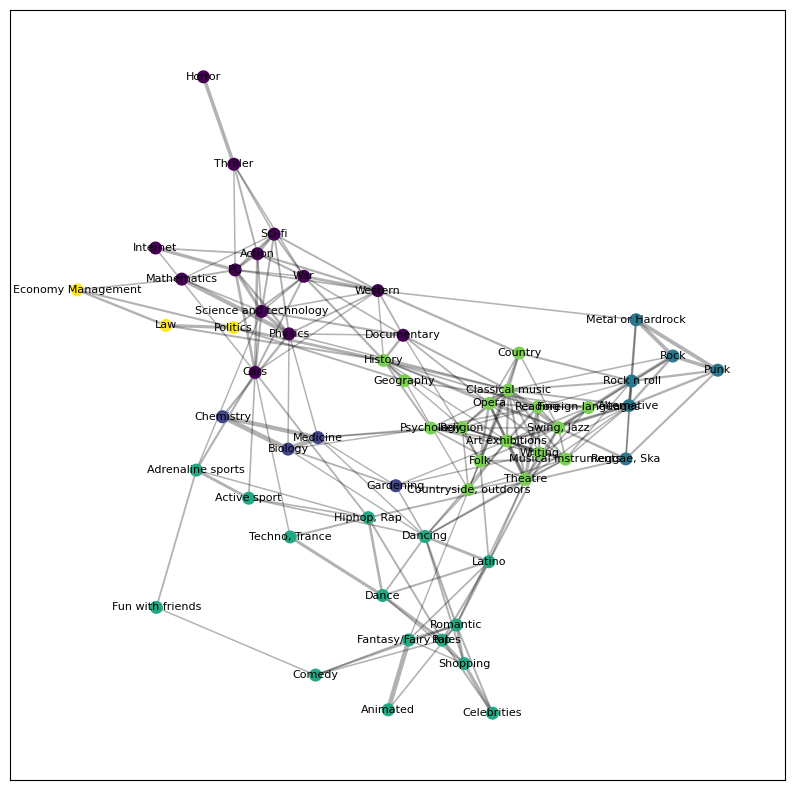

In [ ]:
pos = nx.spring_layout(filtered_graph, seed=42)

plt.figure(figsize=(10, 10))
cmap = mpl.colormaps['viridis']
nx.draw_networkx_nodes(filtered_graph, pos, partition.keys(), node_size=70,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(filtered_graph, pos, alpha=0.3, width=edge_widths)
nx.draw_networkx_labels(filtered_graph, pos, font_size=8)

plt.show()

In [ ]:
nt = Network('1000px', '1000px', notebook=True,  cdn_resources='in_line', bgcolor="#222222", font_color="white")

for node, attributes in filtered_graph.nodes(data=True):
    nt.add_node(node, label=node)

for node1, node2, attributes in filtered_graph.edges(data=True):
    nt.add_edge(node1, node2, weight=attributes['weight'])

nt.barnes_hut()
nt.show("pyvis.html")
display(HTML('pyvis.html'))

pyvis.html
